# This dataset provides comprehensive information about customers' preferences and behaviors related to airline holiday bookings. With detailed attributes covering various aspects of the booking process, this dataset is ideal for analyzing and understanding customer choices and patterns in the airline industry.

Potential analyses and applications include:

Identifying factors influencing successful holiday bookings and improving conversion rates.

Evaluating the impact of different services (e.g., in-flight meals, extra baggage allowance) on customers' booking decisions.

Assessing the relationship between booking lead time and customer choices.

Analyzing the popularity of various routes and flight schedules.

Investigating the influence of booking channels on customer behavior.

Predicting the likelihood of a successful holiday booking based on customer characteristics.

In [1]:
##Preparing the environment
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set_theme()
sns.set_style('darkgrid')
sns.color_palette("hls", 8)
sns.set_palette('hls')


df = pd.read_csv("/Users/nykia/Downloads/Passanger_booking_data.csv")

In [2]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000
mean,1.591256,84.940582,23.044778,9.066277,0.668773,0.296968,0.427143,7.277524,0.149574
std,1.020167,90.450548,33.887171,5.412569,0.470659,0.456927,0.494668,1.496854,0.356657
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50002 non-null  int64  
 1   sales_channel          50002 non-null  object 
 2   trip_type              50002 non-null  object 
 3   purchase_lead          50002 non-null  int64  
 4   length_of_stay         50002 non-null  int64  
 5   flight_hour            50002 non-null  int64  
 6   flight_day             50002 non-null  object 
 7   route                  50002 non-null  object 
 8   booking_origin         50002 non-null  object 
 9   wants_extra_baggage    50002 non-null  int64  
 10  wants_preferred_seat   50002 non-null  int64  
 11  wants_in_flight_meals  50002 non-null  int64  
 12  flight_duration        50002 non-null  float64
 13  booking_complete       50002 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
# Check for duplicates

df.duplicated().sum()

719

There are 719 duplicated rows in the dataset.

In [5]:
#Removing the 719 duplicated rows

df = df.drop_duplicates()


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49283 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49283 non-null  int64  
 1   sales_channel          49283 non-null  object 
 2   trip_type              49283 non-null  object 
 3   purchase_lead          49283 non-null  int64  
 4   length_of_stay         49283 non-null  int64  
 5   flight_hour            49283 non-null  int64  
 6   flight_day             49283 non-null  object 
 7   route                  49283 non-null  object 
 8   booking_origin         49283 non-null  object 
 9   wants_extra_baggage    49283 non-null  int64  
 10  wants_preferred_seat   49283 non-null  int64  
 11  wants_in_flight_meals  49283 non-null  int64  
 12  flight_duration        49283 non-null  float64
 13  booking_complete       49283 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ 

In [7]:
#Checking for null values

df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

# Data Cleaning

I am now going to start cleaning the columns so that the trip_type, "sales_channel columns are type 'category' and converting "wants_extra_baggage","wants_preferred_seat","wants_in_flight_meals","booking_complete" columns in to Yes/No values so that it is easier to visualize and understand.

In [8]:
# Changing dtype of trip_type and sales_channel to category type
df[["trip_type", "sales_channel"]] = df[
    ["trip_type", "sales_channel"]
].astype("category")

extras = [
    "wants_extra_baggage",
    "wants_preferred_seat",
    "wants_in_flight_meals",
    "booking_complete",
]
# Converting extras to boolean values
df[extras] = df[extras].replace({0: "No", 1: "Yes"})




# Q1: Identifying factors influencing successful holiday bookings and improving conversion rates.


In [9]:
#Creating a table to only show completed bookings

completed_bookings = df[df['booking_complete'] == 'Yes']

#Creating a table to only show incomplete bookings

incomplete_bookings = df[df['booking_complete'] == 'No']

incomplete_bookings.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,Yes,No,No,5.52,No
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,No,No,No,5.52,No
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,Yes,Yes,No,5.52,No
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,No,No,Yes,5.52,No
5,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,Yes,No,Yes,5.52,No


In [10]:
incomplete_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41891 entries, 1 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   num_passengers         41891 non-null  int64   
 1   sales_channel          41891 non-null  category
 2   trip_type              41891 non-null  category
 3   purchase_lead          41891 non-null  int64   
 4   length_of_stay         41891 non-null  int64   
 5   flight_hour            41891 non-null  int64   
 6   flight_day             41891 non-null  object  
 7   route                  41891 non-null  object  
 8   booking_origin         41891 non-null  object  
 9   wants_extra_baggage    41891 non-null  object  
 10  wants_preferred_seat   41891 non-null  object  
 11  wants_in_flight_meals  41891 non-null  object  
 12  flight_duration        41891 non-null  float64 
 13  booking_complete       41891 non-null  object  
dtypes: category(2), float64(1), int64(4), 

num_passengers           41891
sales_channel            41891
trip_type                41891
purchase_lead            41891
length_of_stay           41891
flight_hour              41891
flight_day               41891
route                    41891
booking_origin           41891
wants_extra_baggage      41891
wants_preferred_seat     41891
wants_in_flight_meals    41891
flight_duration          41891
booking_complete         41891
dtype: int64

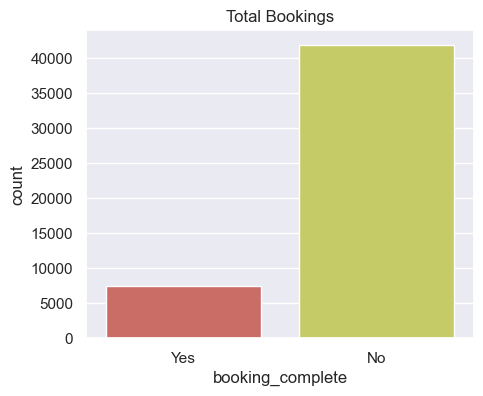

In [29]:
fix, ax = plt.subplots(figsize=(5,4))

sns.countplot(x='booking_complete', data=df).set(title='Total Bookings')
incomplete_bookings.count()

There's a total of 41891 flights booked during the holidays, only 7392 of those bookings were completed, leaving 34499 uncompleted. 

In [12]:
perct_bookings = round(completed_bookings['booking_complete'].count() / df['booking_complete'].count() * 100)
perct_bookings


15

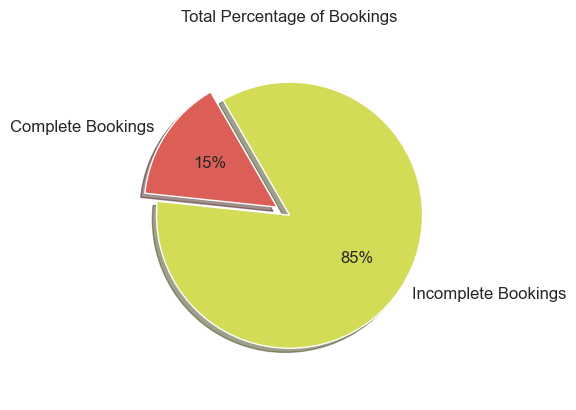

In [13]:
slices = [perct_bookings, (100 - perct_bookings)]
plt.title('Total Percentage of Bookings')

plt.pie(slices, labels=['Complete Bookings', 'Incomplete Bookings'], autopct='%1.0f%%', explode=(0.1, 0),
       startangle=120, radius=0.9, textprops={'fontsize':12}, shadow=True)

plt.show()

Here we see that only 15% of the bookings were completed.

In [14]:
df.groupby('booking_complete')['booking_complete'].count()

booking_complete
No     41891
Yes     7392
Name: booking_complete, dtype: int64

<Axes: xlabel='sales_channel', ylabel='count'>

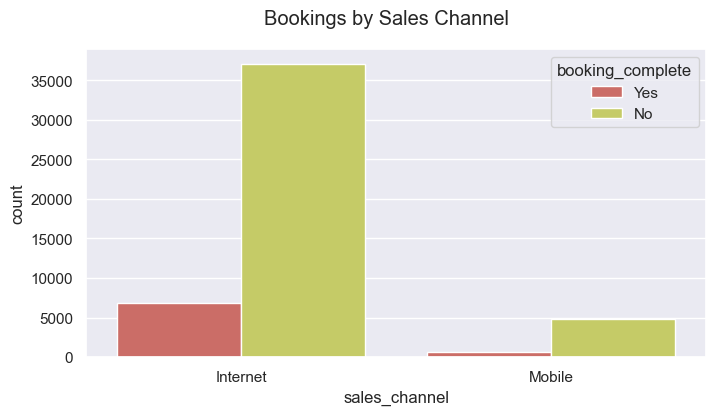

In [15]:
fig, ax = plt.subplots(figsize=(8, 4))
fig.suptitle('Bookings by Sales Channel')
sns.countplot(x='sales_channel', hue='booking_complete', data=df)

Majority of the sales booked on the internet are incomplete. Less people are also booking flights from mobile devices and the ones that are, aren't completing their bookings. 

In [103]:
mobile_books = completed_bookings[completed_bookings['sales_channel'] == 'Mobile']
internet_books = completed_bookings[completed_bookings['sales_channel'] == 'Internet']
mobile_books.head()

num_of_bookings = completed_bookings.groupby('flight_day')['flight_day'].count()
num_of_bookings

flight_day
Fri     976
Mon    1194
Sat     855
Sun     911
Thu    1109
Tue    1117
Wed    1230
Name: flight_day, dtype: int64

In [118]:
completed_bookings['flight_hour'].max()

23

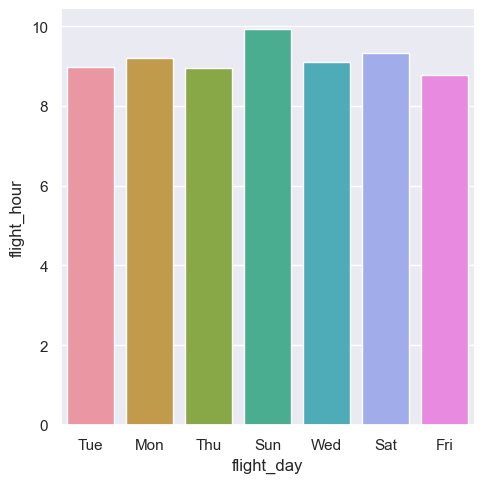

In [116]:


sns.catplot(x='flight_day', y='flight_hour', data=completed_bookings, kind='bar', errorbar=None)


plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

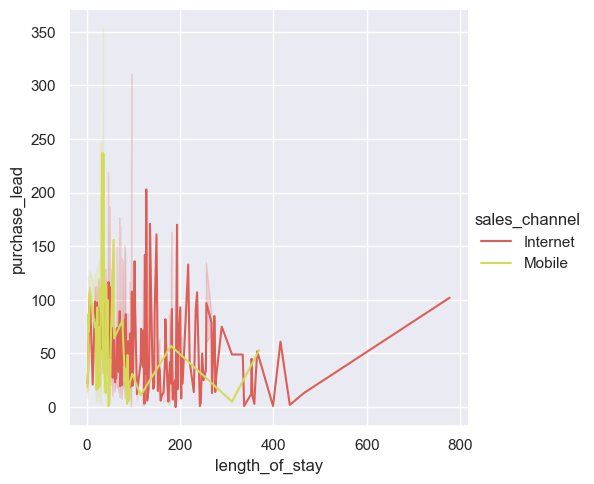

In [94]:


sns.relplot(data=completed_bookings, x='length_of_stay', y='purchase_lead', hue='sales_channel', kind='line')
plt.show


<Axes: xlabel='wants_in_flight_meals', ylabel='count'>

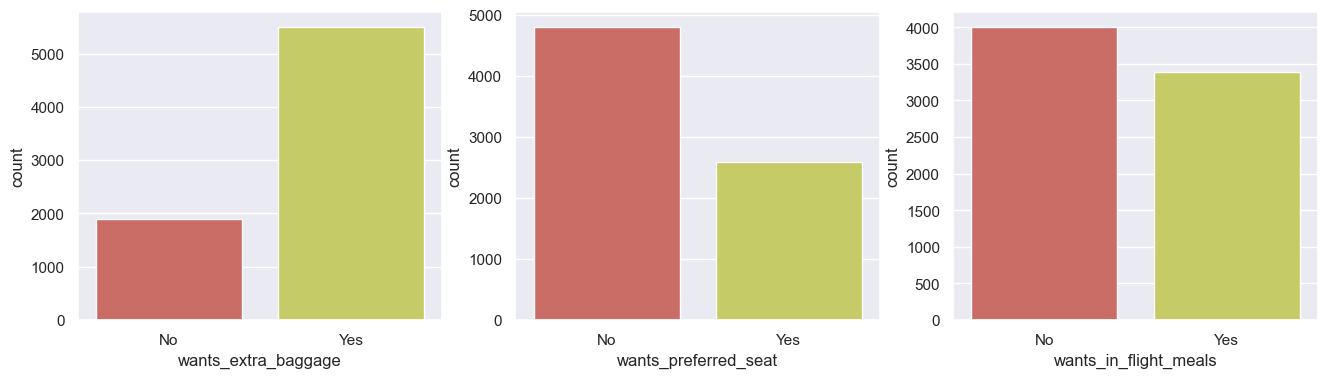

In [18]:
fig, ax = plt.subplots(1,3, figsize=(16, 4))



sns.countplot(x='wants_extra_baggage', data=completed_bookings, ax=ax[0])
sns.countplot(x='wants_preferred_seat', data=completed_bookings, ax=ax[1])
sns.countplot(x='wants_in_flight_meals', data=completed_bookings, ax=ax[2])



Customers who wants extra baggage are more like to complete their booking

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,No,No,No,7.21,Yes
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,Yes,No,No,5.52,No
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,No,No,No,5.52,No
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,Yes,Yes,No,5.52,No
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,No,No,Yes,5.52,No


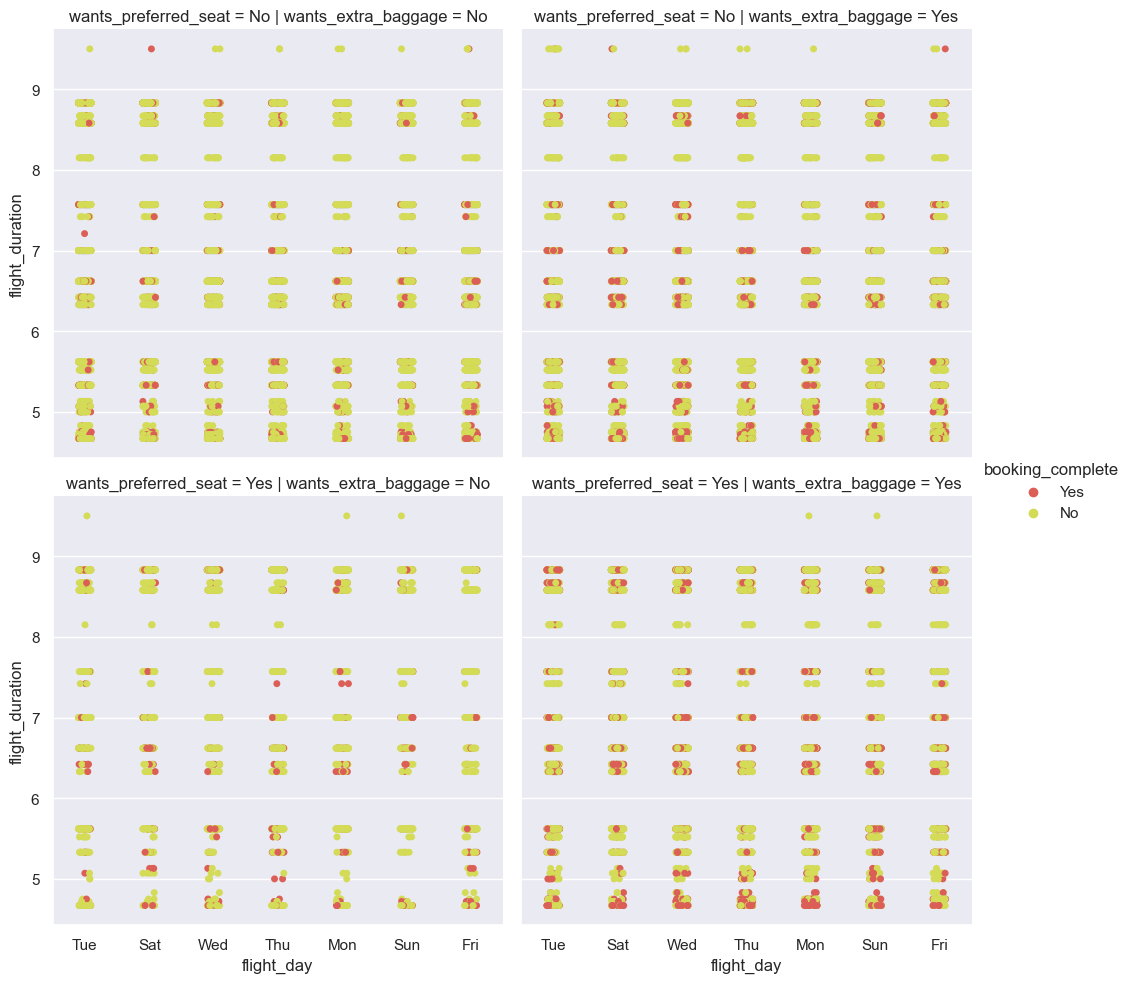

In [23]:
sns.catplot(x='flight_day',y='flight_duration', data=df, col='wants_extra_baggage', row='wants_preferred_seat', hue='booking_complete')
df.head()

Customers who wants preferred seating and extra baggage are more likely to book flights 5 hours or less

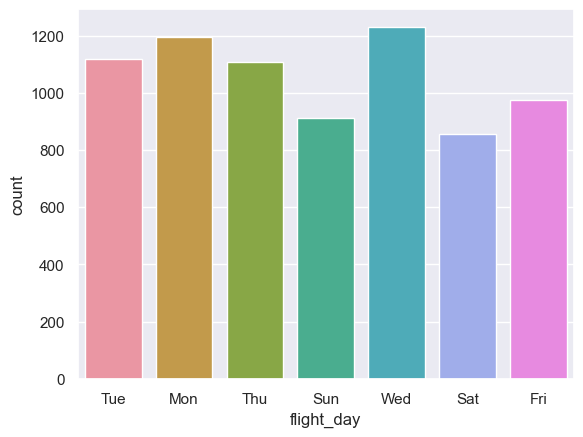

In [119]:
sns.countplot(x='flight_day', data=completed_bookings)
plt.show()

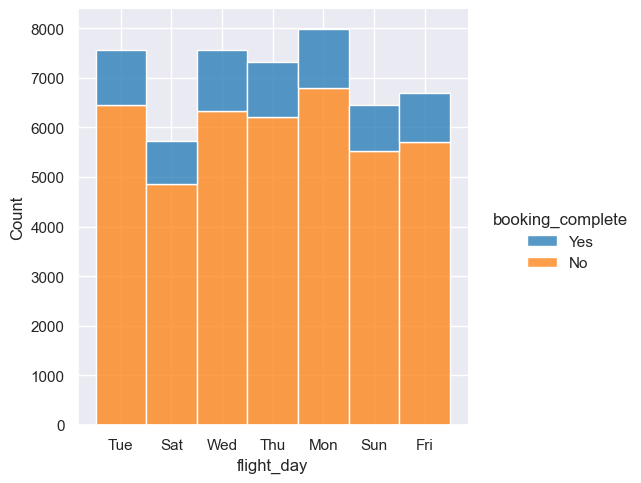

In [21]:
sns.displot(data=df, x='flight_day', hue='booking_complete', multiple='stack', palette='tab10')

In [22]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,No,No,No,7.21,Yes
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,Yes,No,No,5.52,No
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,No,No,No,5.52,No
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,Yes,Yes,No,5.52,No
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,No,No,Yes,5.52,No
